In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.DataFrame({'A':[1,np.nan,np.nan,np.nan],'B':[2,5,8,np.nan],'c':[3,6,np.nan,np.nan]})
df

,A,B,c
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN
3,NaN,NaN,NaN


In [3]:
df.isnull()

,A,B,c
0,False,False,False
1,True,False,False
2,True,False,True
3,True,True,True


In [4]:
df.notnull()

,A,B,c
0,True,True,True
1,False,True,True
2,False,True,False
3,False,False,False


In [5]:
df.isnull().sum()

A    3
B    1
c    2
dtype: int64

In [6]:
df.dropna()

,A,B,c
0,1.0,2.0,3.0


In [7]:
df.dropna(axis =1)# by default it works like any.  ##df.dropna(axis =1,how = any)# by default it works like any.

""
0
1
2
3


In [8]:
df.dropna(how ='all') # by default it works like any. # it removes all garbage rows.

,A,B,c
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN


In [9]:
df.dropna(thresh =1) #thrsh =1 ,drop the row which doesnt have any non nullvalue
#thrsh =2 ,drop the row which  have only one non nullvalue

,A,B,c
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN


In [10]:
df.dropna(subset =['B'])

,A,B,c
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN


In [11]:
df.fillna(0)
#df.fillna(
#    ['value=None', 'method=None', 'axis=None', 'inplace=False', 'limit=None', 'downcast=None', '**kwargs'],
#    method : {'backfill', 'bfill', 'pad', 'ffill', None}, 

,A,B,c
0,1.0,2.0,3.0
1,0.0,5.0,6.0
2,0.0,8.0,0.0
3,0.0,0.0,0.0


In [12]:
df.fillna(method ='ffill')

,A,B,c
0,1.0,2.0,3.0
1,1.0,5.0,6.0
2,1.0,8.0,6.0
3,1.0,8.0,6.0


In [30]:
df['A'].mean()

1.0

In [33]:
df['A']=df['A'].fillna(df['A'].mean()) #filling with mean 

In [34]:
df

,A,B,c
0,1.0,2.0,3.0
1,1.0,5.0,6.0
2,1.0,8.0,NaN
3,1.0,NaN,NaN


In [36]:
ser1= pd.Series({1:'India',5:'Bhutan',10:'Nepal'})
ser1

1      India
5     Bhutan
10     Nepal
dtype: object

In [39]:
ser1.reindex(range(15),fill_value ='USA') # adding new index.

0        USA
1      India
2        USA
3        USA
4        USA
5     Bhutan
6        USA
7        USA
8        USA
9        USA
10     Nepal
11       USA
12       USA
13       USA
14       USA
dtype: object

In [41]:
ser1.reindex(range(15),method ='ffill') # adding new index.

0        NaN
1      India
2      India
3      India
4      India
5     Bhutan
6     Bhutan
7     Bhutan
8     Bhutan
9     Bhutan
10     Nepal
11     Nepal
12     Nepal
13     Nepal
14     Nepal
dtype: object

In [42]:
ser1.reindex(range(15),method ='bfill') # adding new index.

0      India
1      India
2     Bhutan
3     Bhutan
4     Bhutan
5     Bhutan
6      Nepal
7      Nepal
8      Nepal
9      Nepal
10     Nepal
11       NaN
12       NaN
13       NaN
14       NaN
dtype: object

In [44]:
ser1.reindex(range(15),method ='nearest') # adding new index.

0      India
1      India
2      India
3     Bhutan
4     Bhutan
5     Bhutan
6     Bhutan
7     Bhutan
8      Nepal
9      Nepal
10     Nepal
11     Nepal
12     Nepal
13     Nepal
14     Nepal
dtype: object

In [46]:
ddf =sns.load_dataset('tips')

In [47]:
ddf.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [71]:
ddf.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


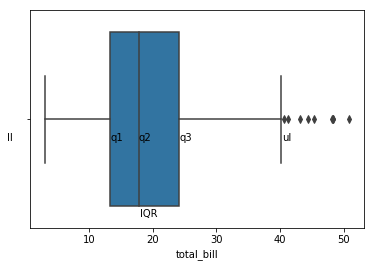

In [94]:
sns.boxplot(ddf.total_bill)
plt.text(x = ul, y = 0.1,s ='ul')
plt.text(x = ll, y = 0.1,s ='ll')

plt.text(x = q1, y = 0.1,s ='q1')
plt.text(x = q2, y = 0.1,s ='q2')
plt.text(x = q3, y = 0.1,s ='q3')
plt.text(x = 18, y = 0.45,s ='IQR')

plt.show()

In [51]:
q1 =ddf['total_bill'].quantile(0.25)

In [52]:
q3 =ddf['total_bill'].quantile(0.75)

In [55]:
iqr = q3-q1

In [57]:
ul = q3+1.5*iqr
ul

40.29749999999999

In [59]:
ll = q1-1.5*iqr
ll

-2.8224999999999945

In [62]:
q2 = ddf['total_bill'].median()
q2

17.795

In [81]:
 x =ddf[ddf['total_bill'] >=ul].index   #and (ddf['total_bill'] <=ll)]#['total_bill']

Int64Index([59, 102, 142, 156, 170, 182, 184, 197, 212], dtype='int64')

In [79]:
ddf['total_bill'].skew()

1.1332130376158205

In [83]:
dd =ddf[ddf['total_bill'] <ul]

In [85]:
dd['total_bill'].skew()

0.7255976389840281

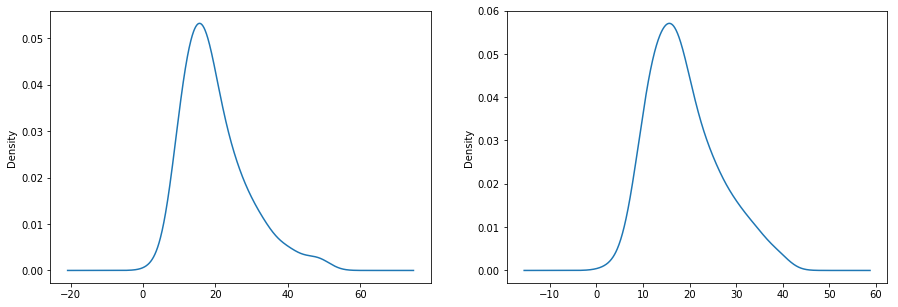

In [90]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
ddf['total_bill'].plot(kind ='kde',ax =axes[0])
dd['total_bill'].plot(kind ='kde',ax =axes[1])
plt.show()

In [91]:
print(ddf['total_bill'].skew())
print(dd['total_bill'].skew())
print(ddf['total_bill'].kurt())
print(dd['total_bill'].kurt())


1.1332130376158205
0.7255976389840281
1.2184840156638854
0.050898514819063934


In [97]:
mean1 =ddf.total_bill.mean()
std =ddf.total_bill.std()

In [103]:
ddf['zscr'] =(ddf.total_bill-mean1)/std
    

In [104]:
ddf.head()

,total_bill,tip,sex,smoker,day,time,size,zscr
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314066
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.061054
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137497
3,23.68,3.31,Male,No,Sun,Dinner,2,0.437416
4,24.59,3.61,Female,No,Sun,Dinner,4,0.539635


In [132]:
ddf[(ddf.zscr>3) | (ddf.zscr<-3)]

,total_bill,tip,sex,smoker,day,time,size,zscr
59,48.27,6.73,Male,No,Sat,Dinner,4,3.199589
156,48.17,5.00,Male,No,Sun,Dinner,6,3.188356
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.484905
212,48.33,9.00,Male,No,Sat,Dinner,4,3.206329


In [133]:
from scipy.stats import zscore


In [141]:
ddf['zscore1'] = zscore(ddf['total_bill'])

ddf[(ddf.zscore1 >3) | (ddf.zscore1 <-3)]

,total_bill,tip,sex,smoker,day,time,size,zscr,zscore1,zscore1
59,48.27,6.73,Male,No,Sat,Dinner,4,3.199589,3.206166,3.206166
156,48.17,5.00,Male,No,Sun,Dinner,6,3.188356,3.194910,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.484905,3.492068,3.492068
212,48.33,9.00,Male,No,Sat,Dinner,4,3.206329,3.212919,3.212919


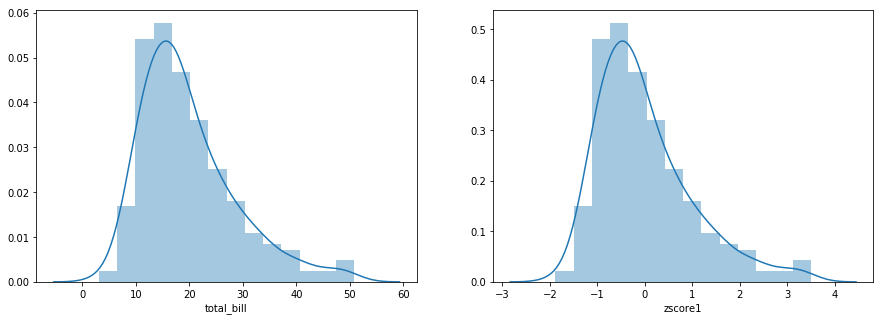

In [143]:

fig,axes = plt.subplots(1,2,figsize =(15,5))
sns.distplot(ddf.total_bill,ax = axes[0])
sns.distplot(ddf.zscore1,ax = axes[1])
plt.show()


In [144]:
print(ddf.total_bill.skew())
print(ddf.zscore1.skew())

1.1332130376158205
1.1332130376158205


In [145]:
from sklearn.model_selection import train_test_split 

In [147]:
x =ddf.drop('total_bill',axis =1)
y =ddf['total_bill']

In [152]:
x_train,x_test,y_train,y_test, = train_test_split(x,y,train_size =0.7,random_state =0)

In [153]:
print('size of xtrain is',x_train.shape)
print('size of ytrain is',y_train.shape)
print('size of xtext is',x_test.shape)
print('size of ytext is',y_test.shape)

size of xtrain is (170, 9)
size of ytrain is (170,)
size of xtext is (74, 9)
size of ytext is (74,)
